# Case Study 1
## Suggesting Product Prices to Online Sellers

### Overview
Nowadays a lot of sellers are selling their products online. Different types of products are listed in the platform, so it can be hard to know how much something’s really worth. Small details can mean big differences in pricing. For example, one of these sweaters cost 335 USD and the other cost 9.99 USD, as one is having some more extra features than the other one.

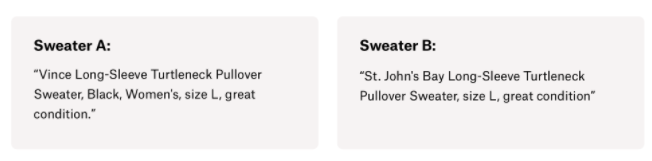

                                            Source: from Kaggle
Different products have different price ranges. Also the same kind of features with different features have different price ranges.

Product pricing gets even harder at scale, considering just how many products are sold online. Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs.
The main motto of this problem is to offer pricing suggestions to sellers, for that we have to make an algorithm which will automatically suggest the right product prices.

As a data to start our problem we have some user input text descriptions of their products, including details like  product category name, brand name, and item condition.

<B>Dataset details</B>: https://www.kaggle.com/c/mercari-price-suggestion-challenge/data
 
- train_id or test_id - the id of the listing

- name - the title of the listing. Note that we have cleaned the data to remove text that looks like prices (e.g. $20) to avoid   leakage. 

- item_condition_id - the condition of the items provided by the seller

- category_name - category of the listing

- brand_name

- price - the price that the item was sold for. This is the target variable that we will predict. The unit is USD. 

- shipping - 1 if shipping fee is paid by seller and 0 by buyer

- item_description - the full description of the item. 

Here we have to automate this task which will predict the price.


### Business Problem
We need to build an algorithm that automatically suggests the right product prices from the user-inputted text descriptions of their products, including details like product category name, brand name, item condition, etc.

### Business objectives and constraints

- The goal is to solve the problem of suggesting the appropriate price of products to online sellers.
- No latency constraints, because we would like to suggest a highly accurate price to the seller, even if it takes a reasonable amount of time.

### Type of Machine Learning problem
The prices (target) are in real number. Hence, this problem falls under a regression problem.

### Performance Metric

The metric that I will be using is Root Mean Squared Logarithmic Error (RMSLE). Lower the score, better the performace.

RMSLE formula

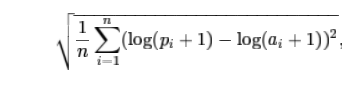

The choice of this metric is due to the following reasons,

- It is robust to outliers.
- It is scale invariant.
- The price distribution is highly skewed to the right (this we will see in the EDA). Meaning there are a lot of low priced products as compared to very high priced products.

### Importing required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib
#matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Reading

In [2]:
data = pd.read_table('train.tsv',sep='\t')
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


### Data Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [4]:
data.shape

(1482535, 8)

Category_name, brand_name and item_description, these three features have some NULL values, we have to impute in according

###  EDA

#### Analyzing  price

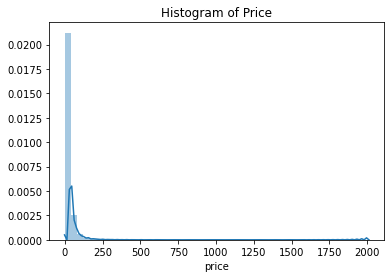

In [5]:
# Plotting Histogram for Price 

sns.distplot(data.price);
plt.title('Histogram of Price');
plt.show()

We can see from the above histogram that the price feature is highly right skewd, as most of the product price is loe, very few products are there, whose price is very high

In [6]:
#print 0 to 100 percentile values of price
for i in range(0,101,10):
    print(i,"th percentile is",np.percentile(data['price'].values, i))

0 th percentile is 0.0
10 th percentile is 7.0
20 th percentile is 10.0
30 th percentile is 12.0
40 th percentile is 14.0
50 th percentile is 17.0
60 th percentile is 20.0
70 th percentile is 26.0
80 th percentile is 34.0
90 th percentile is 51.0
100 th percentile is 2009.0


In [7]:
##print 90 to 100 percentile values of price  
for i in range(90,101):
    print(i,"th percentile is",np.percentile(data['price'].values, i))

90 th percentile is 51.0
91 th percentile is 55.0
92 th percentile is 58.0
93 th percentile is 62.0
94 th percentile is 67.0
95 th percentile is 75.0
96 th percentile is 85.0
97 th percentile is 99.0
98 th percentile is 122.0
99 th percentile is 170.0
100 th percentile is 2009.0


In [8]:
# printing 99 to 100 percentile values of price
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,"th percentile is",np.percentile(data['price'].values, i))

99.1 th percentile is 180.0
99.2 th percentile is 189.0
99.3 th percentile is 200.0
99.4 th percentile is 210.0
99.5 th percentile is 230.3300000000745
99.6 th percentile is 256.0
99.7 th percentile is 286.0
99.8 th percentile is 340.0
99.9 th percentile is 450.0
100 th percentile is 2009.0


So we can see that 99 percentile value is less than equal to 170, while the 100 percentile value is 2009. Let see how many data points are present greater than 170

In [9]:
print('Number of data points having price greater than 170 are {}'.format(data[data.price >170].shape[0]))

Number of data points having price greater than 170 are 14741


Very less number of data points are present which are greater than 170, may be some of them are outliers.

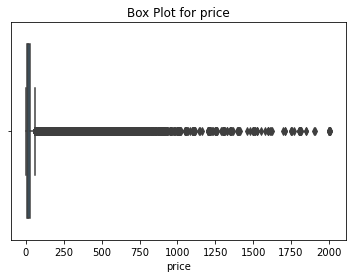

In [10]:
# Plotting the box plot for Price
sns.boxplot(data.price);
plt.title('Box Plot for price');
plt.show()

#### Converting the price into log scale

Since the price feature's distribution is very similar to parito distribution, let convert it to log scale

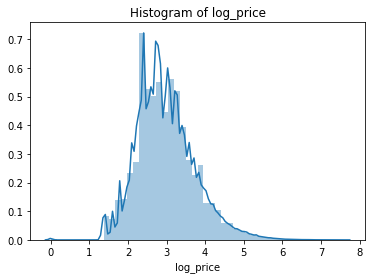

In [11]:
data['log_price'] = np.log(data.price+1) ## Adding 1 with price as some of the values are 0
sns.distplot(data.log_price);
plt.title('Histogram of log_price');
plt.show()

After converting the price into log scale, we can see all the prices lie in the range 0 to 7 and also the previous skewdness is gone

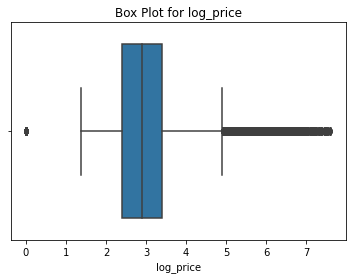

In [12]:
# Plotting the box plot for log_price
sns.boxplot(data.log_price);
plt.title('Box Plot for log_price');
plt.show()

In [13]:
# Checking the Max and min value of log_price
print('Minimum log_Price', data.log_price.min())
print('Maximum log_Price', data.log_price.max())

Minimum log_Price 0.0
Maximum log_Price 7.605890001053122


In [14]:
print('Number of products having price equal to 0 are {}'.format((data.price == 0).sum()))

Number of products having price equal to 0 are 874


In [15]:
#print 0 to 100 percentile values of log_price
for i in range(0,101,10):
    print(i,"th percentile is",np.percentile(data['log_price'].values, i))

0 th percentile is 0.0
10 th percentile is 2.0794415416798357
20 th percentile is 2.3978952727983707
30 th percentile is 2.5649493574615363
40 th percentile is 2.70805020110221
50 th percentile is 2.8903717578961645
60 th percentile is 3.044522437723423
70 th percentile is 3.295836866004329
80 th percentile is 3.555348061489413
90 th percentile is 3.9512437185814275
100 th percentile is 7.605890001053122


#### Analyzing shipping

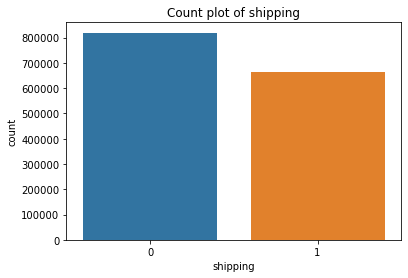

In [16]:
sns.countplot(data.shipping);
plt.title('Count plot of shipping');
plt.show()

As we can see number of shipping charges paid by buyers is higher than that paid by seller

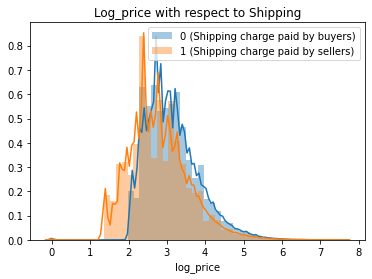

In [17]:
# Histogram of log_price with respect to Shipping

sns.distplot(data.loc[data.shipping == 0,'log_price'],label = '0 (Shipping charge paid by buyers)');
sns.distplot(data.loc[data.shipping == 1,'log_price'],label = '1 (Shipping charge paid by sellers)');
plt.title('Log_price with respect to Shipping')
plt.legend();
plt.show();

From the above graph, we can clearly see that :

- for the product having lower price, the sellers mainly pay the shipping charges.
- but for the product having higher price, the buyers typically pay the shipping charges. 

#### Analyzing Item Condition

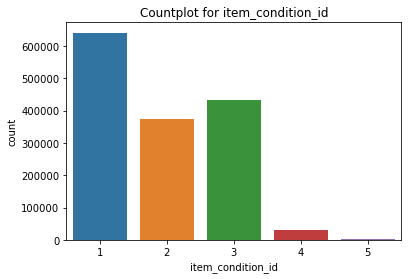

In [18]:
# count plot
sns.countplot(data.item_condition_id);
plt.title('Countplot for item_condition_id');
plt.show()

As we can see, item_condition_id = 4 and item_condition_id - 5 are very less.

**Let see the price with respect to each item_condition_id**

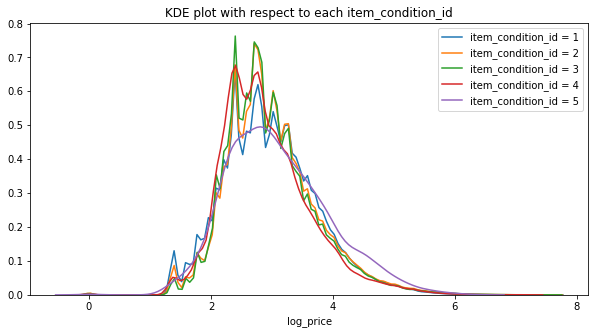

In [19]:
#KDE plot with respect to each item_condition_id
plt.figure(figsize=(10,5))
for i in set(data.item_condition_id):
    sns.kdeplot(data.loc[data.item_condition_id == i, 'log_price'],label='item_condition_id = '+str(i));
plt.title('KDE plot with respect to each item_condition_id');
plt.legend();
plt.xlabel('log_price');
plt.show()

We can see that, condition id = 2, 3 and 4 slightly high at mid_price range and condition id = 5 at higher price range. But as a whole all the plots are overlapinf each other, hard to fetch any information from that.

let see the graph slightly in deep using violin plot

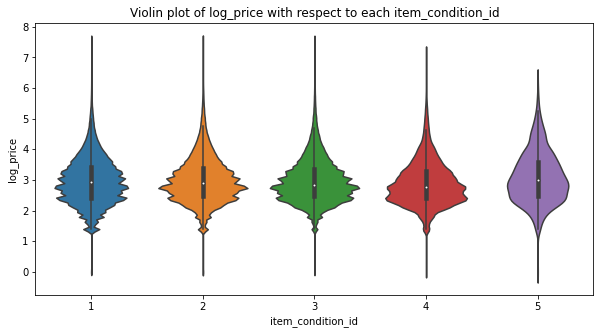

In [20]:
#Violin plot for a clear view of log_price with respect to each item_condition_id
plt.figure(figsize = (10,5));
sns.violinplot(y= 'log_price', x= 'item_condition_id', data=data);
plt.title('Violin plot of log_price with respect to each item_condition_id');
plt.show()


So from violin plot, we can see that median of each plots are very similar and aslo they are overlapping on each other

#### Analyzing category_name

In [21]:
data.category_name.head(10)

0                                    Men/Tops/T-shirts
1    Electronics/Computers & Tablets/Components & P...
2                          Women/Tops & Blouses/Blouse
3                   Home/Home Décor/Home Décor Accents
4                              Women/Jewelry/Necklaces
5                                    Women/Other/Other
6                             Women/Swimwear/Two-Piece
7                      Sports & Outdoors/Apparel/Girls
8                      Sports & Outdoors/Apparel/Girls
9             Vintage & Collectibles/Collectibles/Doll
Name: category_name, dtype: object

As we can see from the above output, that in category_name features, three types of information -

- High level information about the category or the product (let name it as **category_1**)
- little descriptive information abouyt the category of the product (let name it as **category_2**)
- main product category (let name it as **category_3**)

Lets divide the category into three category level

In [22]:
# Checking if every category row has 2 '/'
(data.category_name.str.count('/') <  2).sum()

0

In [23]:
# checking null values
null_values = data.category_name.isnull().sum()
print('{}% null values are present in Category feature'.format(round(null_values * 100 / data.shape[0],2)))

0.43% null values are present in Category feature


In [24]:
## Dividing category into three level

data['category_1'] = data.category_name.apply(lambda x: str(x).split('/')[0] if x is not np.nan else np.nan)
data['category_2'] = data.category_name.apply(lambda x: str(x).split('/')[1] if x is not np.nan else np.nan)
data['category_3'] = data.category_name.apply(lambda x: str(x).split('/')[2] if x is not np.nan else np.nan)

In [25]:
data[['category_1','category_2','category_3']].head()

,category_1,category_2,category_3
0,Men,Tops,T-shirts
1,Electronics,Computers & Tablets,Components & Parts
2,Women,Tops & Blouses,Blouse
3,Home,Home Décor,Home Décor Accents
4,Women,Jewelry,Necklaces


In [26]:
## Checking for Null values

data.category_1.isnull().sum()

6327

In [27]:
## Imputing null values for all the categories with others 
for i in [1,2,3]:
    data['category_'+str(i)] = data['category_'+str(i)].fillna('Other') 

In [28]:
## Checking for Null values

data.category_1.isnull().sum(),data.category_2.isnull().sum(),data.category_3.isnull().sum()

(0, 0, 0)

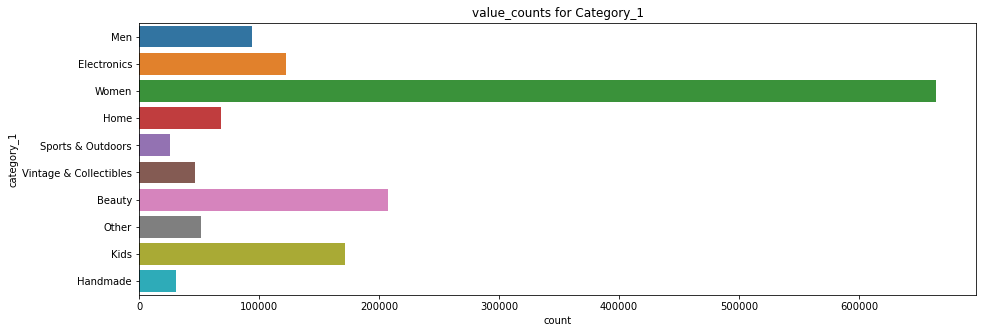

In [29]:
#Value_counts for category 1
plt.figure(figsize=(15,5))
sns.countplot(y= data.category_1)
plt.title('value_counts for Category_1');
#plt.xlabel('Category_1');
plt.show()

In [30]:
data.category_2.value_counts()

Athletic Apparel        134383
Makeup                  124624
Tops & Blouses          106960
Shoes                   100452
Jewelry                  61763
                         ...  
Candles                     64
Ceramics and Pottery        57
Dolls and Miniatures        49
Books and Zines             46
Quilts                      31
Name: category_2, Length: 113, dtype: int64

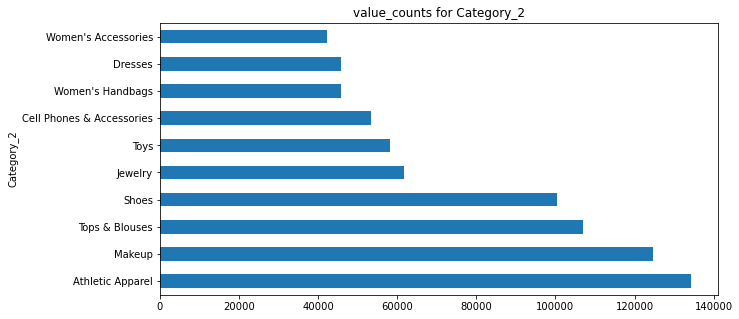

In [31]:
## Top 10 category_2 values
plt.figure(figsize=(10,5))
data.category_2.value_counts()[:10].plot(kind='barh')
#sns.countplot(y= data.category_2)
plt.title('value_counts for Category_2');
plt.ylabel('Category_2');
plt.show()

In [32]:
data.category_3.value_counts()

Pants, Tights, Leggings    60177
Other                      56551
Face                       50171
T-Shirts                   46380
Shoes                      32168
                           ...  
Something Blue                 1
Educational                    1
New Years                      1
Cleaning                       1
Seasonal                       1
Name: category_3, Length: 870, dtype: int64

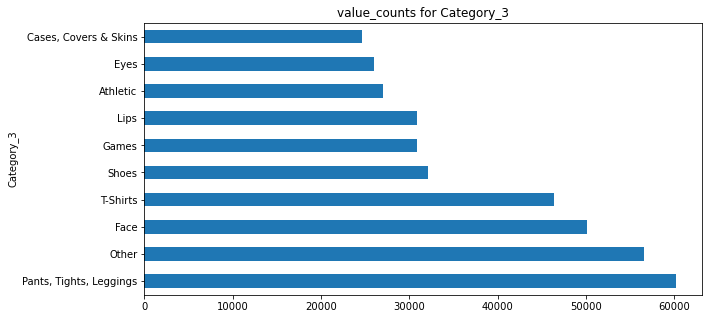

In [33]:
## Top 10 category_3 values
plt.figure(figsize=(10,5))
data.category_3.value_counts()[:10].plot(kind='barh')

plt.title('value_counts for Category_3');
plt.ylabel('Category_3');
plt.show()

As we can see from above analysis, 
- In category_1 women is is the highest followed by beauty and kids
- In category_2 Athletic Apparel is the highest followed by makeup, tops & Blouse and Shoes
- In category_3 pants, tights , leggings is the highest followed by other and face

So we can get an idea aboy the category, that lot of women customers are there who bought beauty products (women, Face, Makeup, Jewelry) and garments (Tops & Blouses,Pants, Tights, Leggings, Shoes ) in a large quantity. 

#### Analysing Brand_Name

In [34]:
#Checking Null values
null_values = data.brand_name.isnull().sum()
print('{}% null values are present in Brand Name feature'.format(round(null_values * 100 / data.shape[0],2)))

42.68% null values are present in Brand Name feature


In [35]:
#Number of unique values in brand_name
print('Number of unique brand names: {}'.format(data.brand_name.value_counts().shape[0]))

Number of unique brand names: 4809


As we know, top brands are always costly. Let see our top 15 brands with respect to price.

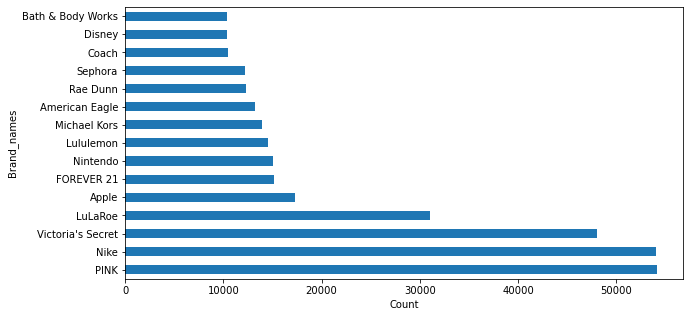

In [36]:
# Top 15 brands
plt.figure(figsize=(10,5));
data.brand_name.value_counts()[:15].plot(kind='barh');
plt.ylabel('Brand_names')
plt.xlabel('Count')
plt.show()



As we can see from the above graph, Pink, Nike and Victoria's Secret are the top 3 brands.

PINK --> Womens' Clothing

Nike --> Sports

Victoria's Secrert --> Womens'

**Lets impute the missing brand name**

There are almost 43% of datapoints having brand name is null, so we have to impute this carefully.

One technique of imputing brand name is 
- finding the name from item description of the product and from the name of the product.
- If we not find the brand name from item description or product name, we can label as unknown 

In [37]:
from joblib import Parallel, delayed

# Unique brand name
unique_brand = set(data.loc[~data.brand_name.isnull(),'brand_name'])

#fetching all tghe index values where brand_name = NaN
null_index = list(data[data.brand_name.isnull()].index)

#As there are lot of brand names and null values, we will divide the task in two parts
# We will divide the brand names in two parts, one part will contains small brand names and another part will contain large barnd names
large_brand_names = [i for i in unique_brand if len(i.split())>1]
short_brand_names = list(unique_brand - set(large_brand_names))

def impute_brand_names(index):
    
    impute_value = ()

    flag = 0
    for i in short_brand_names:
        if (i in str(data.loc[index,'item_description']).split()) and (i not in ['X','All','Complete']):
            flag = 1
            impute_value = (index,i)
            break
        elif i in str(data.loc[index,'name']).split() and i not in ['X','All','Complete']:
            flag = 1
            impute_value = (index,i)
            break
    if flag == 0:
        for i in large_brand_names :
            if set(i.split()).issubset(str(data.loc[index,'item_description']).split()) and i not in ['X','All','Complete']:
                flag = 1
                impute_value = (index,i)
                break
            elif set(i.split()).issubset(str(data.loc[index,'name']).split()) and i not in ['X','All','Complete']:
                flag = 1
                impute_value = (index,i)
                break
    return impute_value

        
            
imputed_list = Parallel(n_jobs=1)(delayed(impute_brand_names)(i) for i in null_index)




In [49]:
len(imputed_list)

632677

In [52]:
imputed_list[:10]

[(0, 'MLB'), (), (), (), (), (), (), (), (34, 'Gypsy'), ()]

In [54]:
print('Total number of null values :', data.brand_name.isnull().sum())

Total number of null values : 632682


In [61]:
from tqdm.notebook import tqdm 
for tup in tqdm(imputed_list):
    if len(tup) > 0:
        data.loc[tup[0],'brand_name'] = tup[1]

In [66]:
print('After imputing some of the points with the help of name and item_description features, remaining number of null points: ', data.brand_name.isnull().sum())
print('That is {}% of null points are imputed with the previous method'.format(100 - data.brand_name.isnull().sum()*100/632682))

After imputing some of the points with the help of name and item_description features, remaining number of null points:  414888
That is 34.42392860868493% of null points are imputed with the previous method


Now we can fill the remaining 65% of null value as 'Unknown'

In [67]:
data.brand_name.fillna('Unknown',inplace=True)

In [68]:
data.brand_name.isnull().sum()

0

In [69]:
data.isnull().sum()

train_id                0
name                    0
item_condition_id       0
category_name        6327
brand_name              0
price                   0
shipping                0
item_description        4
log_price               0
category_1              0
category_2              0
category_3              0
dtype: int64

##### Saving the final file for further processing 

In [72]:
data[['name','item_condition_id','brand_name','price','shipping','item_description','log_price','category_1','category_2','category_3']].to_csv('data_basic.csv',index=False)

In [73]:
pd.read_csv('data_basic.csv').head()

,name,item_condition_id,brand_name,price,shipping,item_description,log_price,category_1,category_2,category_3
0,MLB Cincinnati Reds T Shirt Size XL,3,MLB,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Unknown,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces
